# Introduction

**Author: Samanyu**<br>
**Language: Python**<br>
**Accelerator: None**<br><br>
**OS: Windows 11 Home Single Language 64-bit**<br>
**CPU: Intel Core i7-10750H @ 2.60GHz**<br>
**RAM: 16.0GB DDR4 @ 1464MHz**<br>
**Graphics: NVIDIA GeForce GTX 1650 (4GB)**<br>



In [1]:
# importing

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Reading and Displaying Train and Test data

In [2]:
df=pd.read_csv(r"C:\Users\Samanyu K\Downloads\train.csv")
te=pd.read_csv(r"C:\Users\Samanyu K\Downloads\test.csv")

In [3]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [4]:
te

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


# Data Preprocessing

In [5]:
# finding any null values
print(df.isnull().any())

x    False
y     True
dtype: bool


In [6]:
# We have one value missing, but that is in the target variable therefore let us go ahead and drop it
df.dropna(inplace=True)

In [7]:
# Let us standardize the values
ss=StandardScaler()
df['x']=ss.fit_transform(df[['x']]) # Standardizing training features
te['x']=ss.transform(te[['x']])

# Linear Regression from Scratch using Gradient Descent

In this implementation, we build a linear regression model manually by optimizing the **slope (m)** and **intercept (b)** using **gradient descent**.

---

## Functions Defined

1. **`gradient_descent(slope, intercept, df, learning_rate)`**  
   - Calculates the gradients of the loss function (Mean Squared Error) with respect to the slope and intercept.
   - Updates the parameters by moving them in the direction of the **negative gradient** scaled by the learning rate.

2. **`main(slope, intercept, df, learning_rate, epochs)`**  
   - Runs the gradient descent algorithm for a fixed number of epochs.
   - Every 100 epochs, prints the current slope and intercept to monitor training progress.
   - Returns the final optimized slope and intercept.

---

## Key Concepts

### Loss Function: Mean Squared Error (MSE)

$$
L = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - (mx_i + b) \right)^2
$$

Where:
- \( y_i \) are the actual values (target),
- \( x_i \) are the features (inputs),
- \( m \) is the slope (weight),
- \( b \) is the intercept (bias).

---

### Gradient of MSE

**With respect to slope \( m \):**

$$
\frac{\partial L}{\partial m} = \frac{1}{N} \sum_{i=1}^{N} \left[ -2x_i \cdot \left( y_i - (mx_i + b) \right) \right]
$$

**With respect to intercept \( b \):**

$$
\frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} \left[ -2 \cdot \left( y_i - (mx_i + b) \right) \right]
$$

---

### Learning Rate

- The **learning rate** controls how big each update step is during gradient descent.
- Too small: slow convergence.
- Too large: may overshoot the minimum.

---

## After Training

- The final values of slope and intercept are printed.
- These can be used to make predictions using:

```python
pred = slope_final * te['x'] + intercept_final


Epoch 0: Slope = 0.5791, Intercept = 0.9988


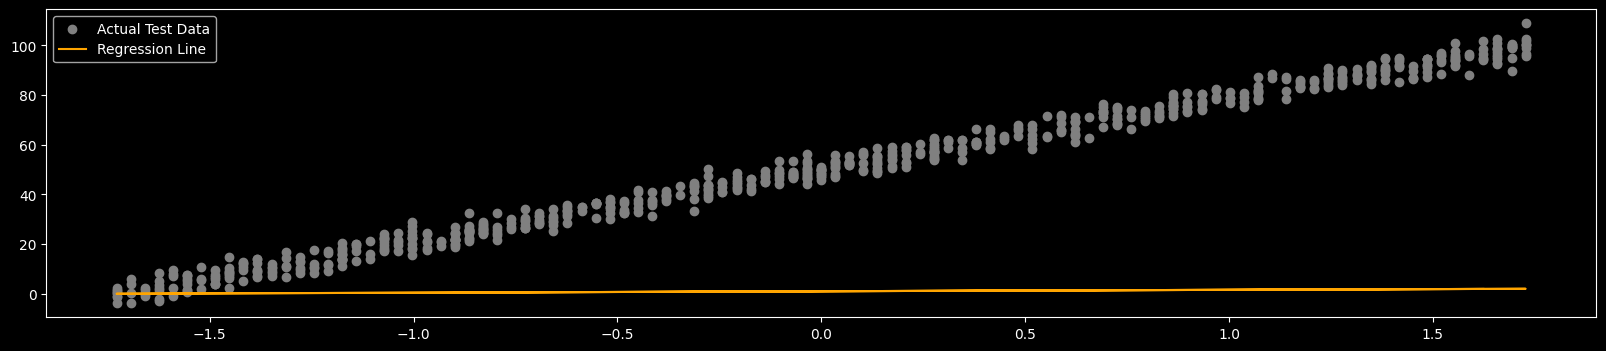

Epoch 100: Slope = 25.1899, Intercept = 43.4493


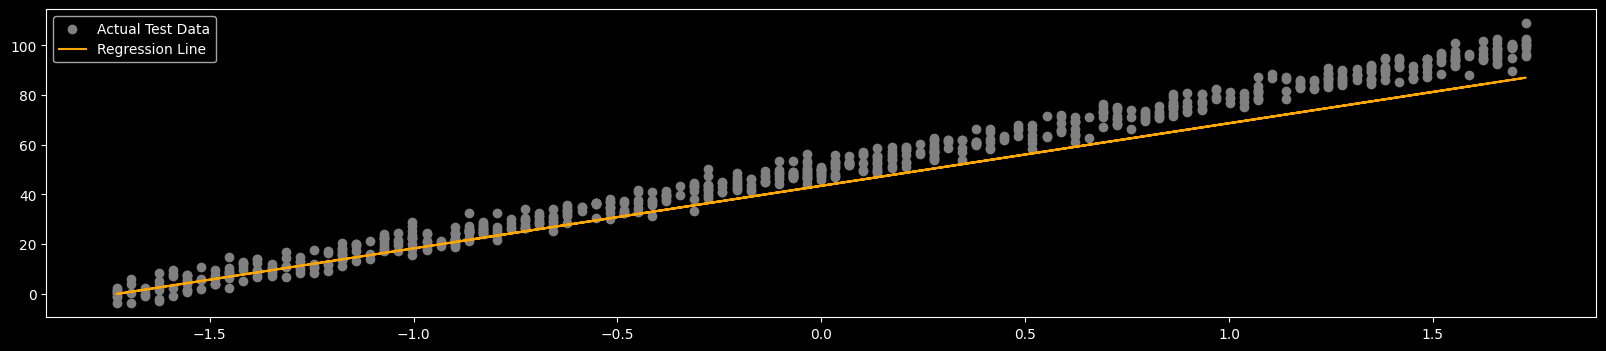

Epoch 200: Slope = 28.4538, Intercept = 49.0791


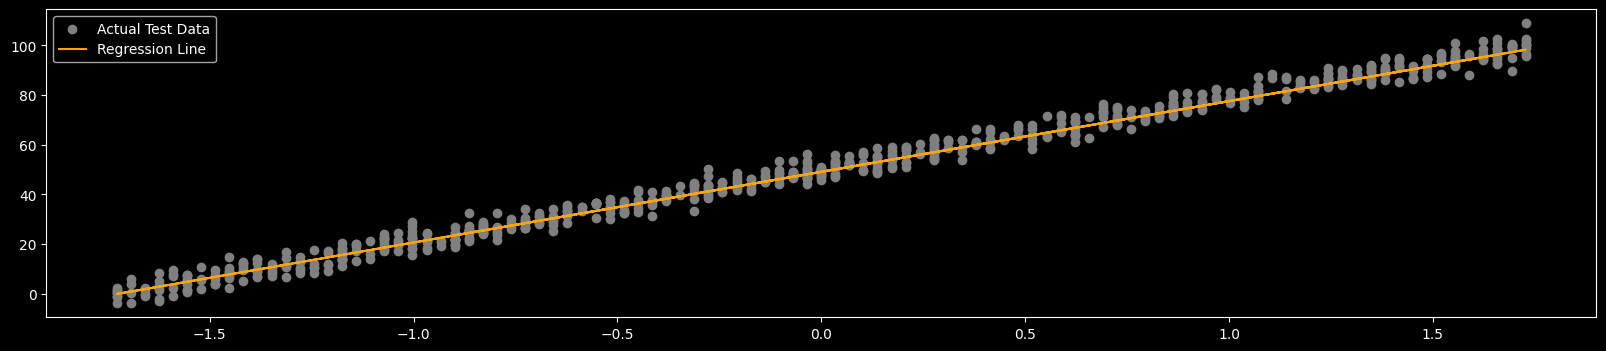

Epoch 300: Slope = 28.8867, Intercept = 49.8257


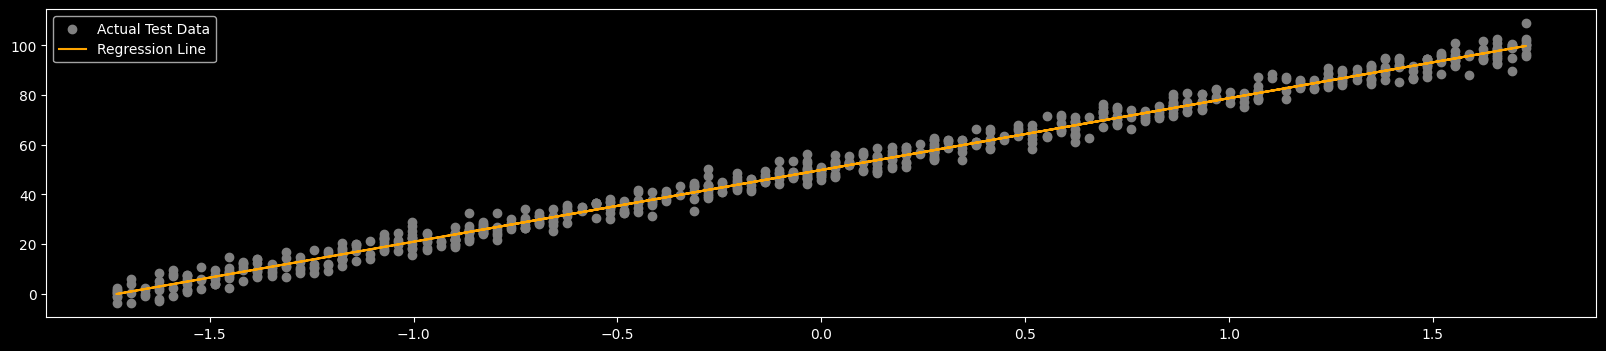

Epoch 400: Slope = 28.9441, Intercept = 49.9247


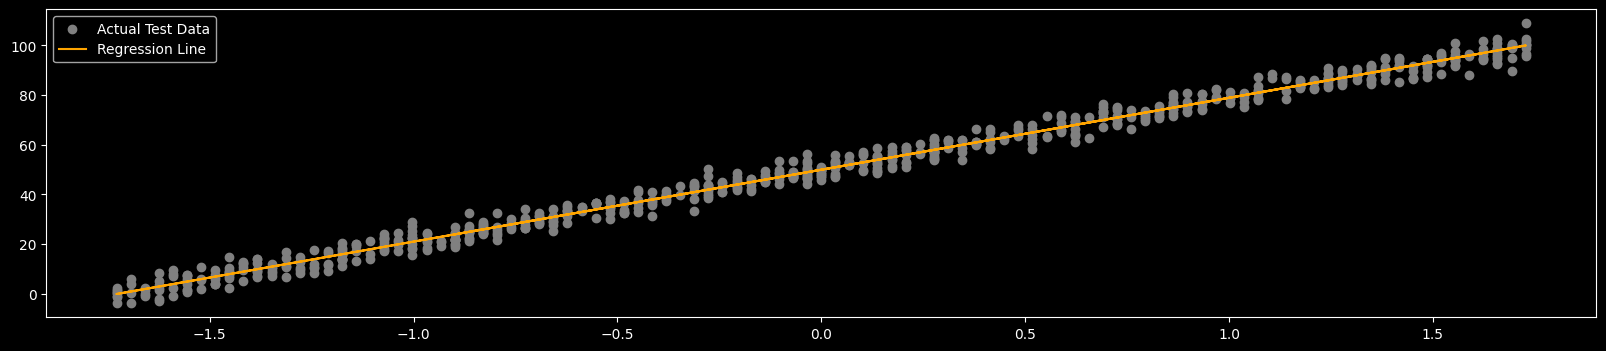

Epoch 500: Slope = 28.9517, Intercept = 49.9379


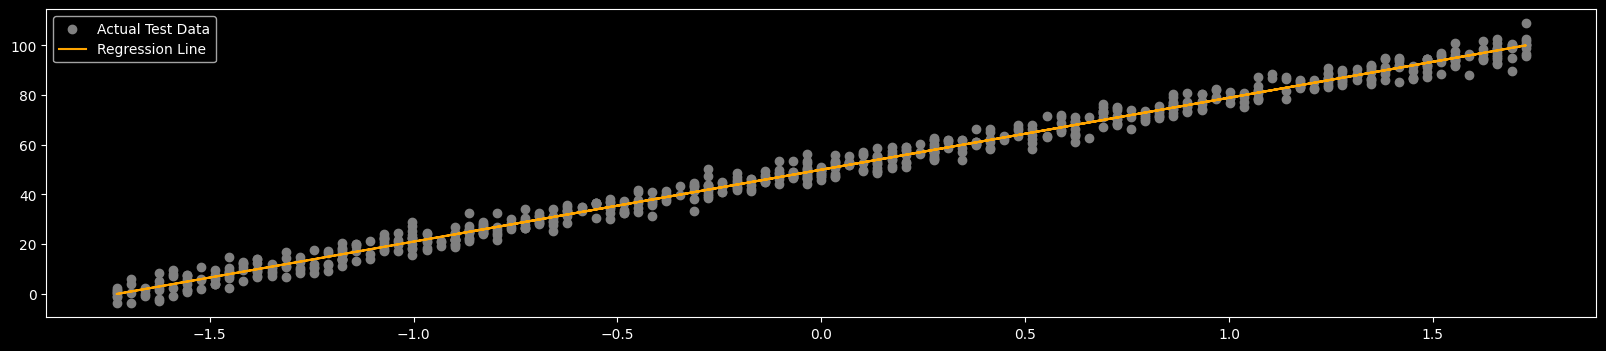

Epoch 600: Slope = 28.9527, Intercept = 49.9396


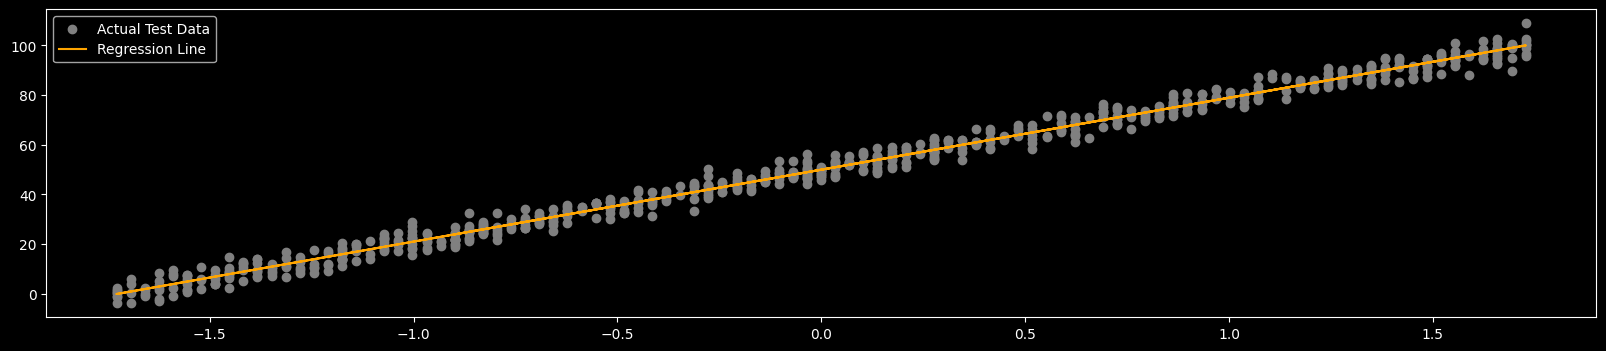

Epoch 700: Slope = 28.9528, Intercept = 49.9398


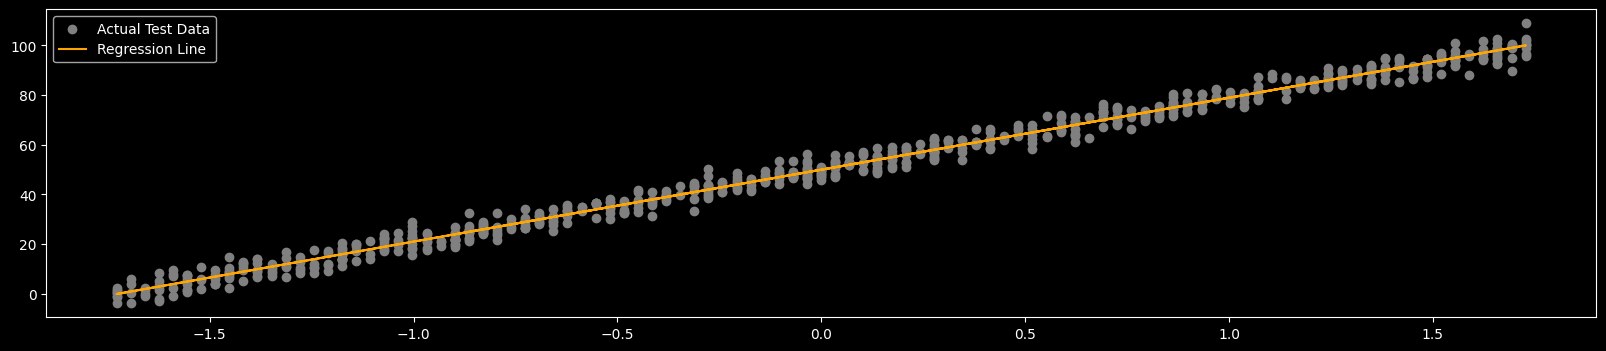

Epoch 800: Slope = 28.9528, Intercept = 49.9399


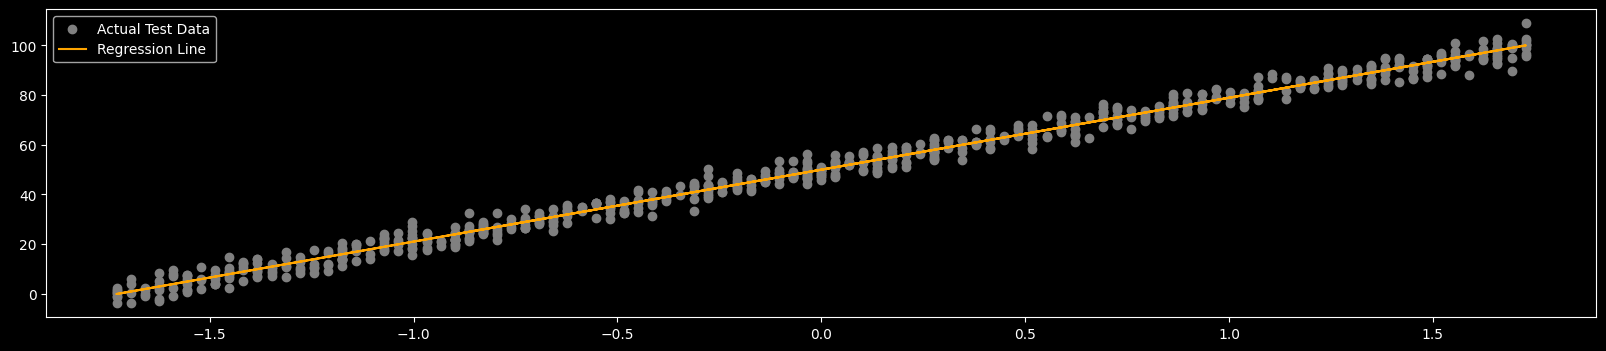

Epoch 900: Slope = 28.9528, Intercept = 49.9399


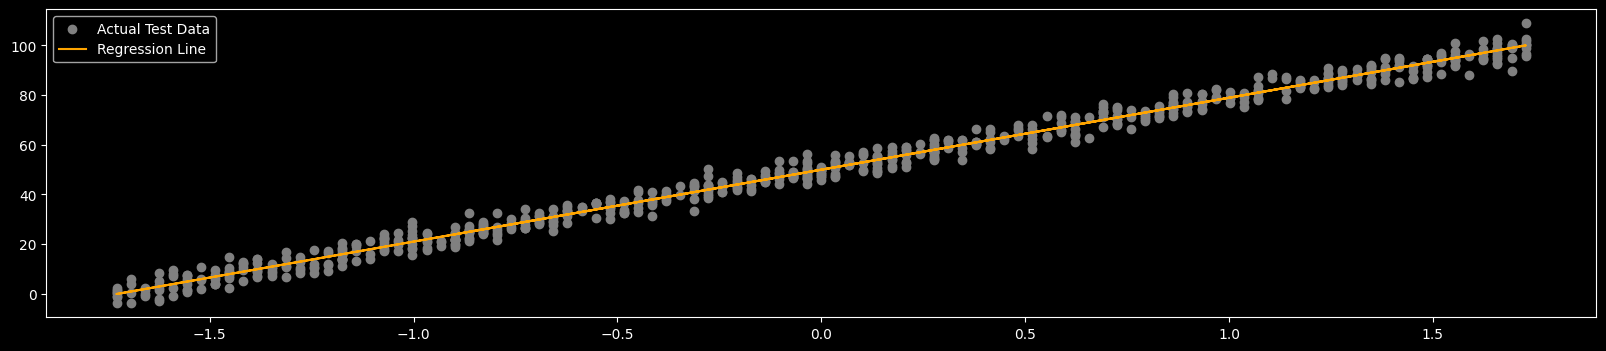



 Final Slope:  28.952832985067165 Final Intercept:  49.939869086410624


In [16]:
# First let us define our functions
# Our first function is to calculate our slope and intercept using gradient descent
# Our second function will iterate over a set number of epochs

def gradient_descent(slope,intercept,df,learning_rate):

    slope_g=0 # slope gradient
    intercept_g=0 # Intercept gradient
    N=len(df) # Total training Examples in the training set

    for i in range(N): # looping over the training features
        x=df.iloc[i].x 
        y=df.iloc[i].y

        slope_g+=-(2/N)*x*(y-(slope*x+intercept)) # Calculating slope gradient
        intercept_g+=-(2/N)*(y-(slope*x+intercept)) # Calculating intercept gradient

    slope_new=slope-slope_g*learning_rate # New slope
    intercept_new=intercept-intercept_g*learning_rate # New Gradient

    return slope_new,intercept_new

def main(slope,intercept,df,learning_rate,epochs,mse,mae):
    
    for i in range(epochs):
        slope, intercept = gradient_descent(slope, intercept, df, learning_rate)
        if i % 100 == 0:
            print(f"Epoch {i}: Slope = {slope:.4f}, Intercept = {intercept:.4f}")
            plt.style.use('dark_background')
            plt.figure(figsize=(20,4))
            plt.scatter(df['x'], df['y'], color='grey', label='Actual Test Data')
            plt.plot(df['x'],slope*df['x']+intercept, color='orange', label='Regression Line')
            plt.legend()
            plt.show()
            mse.append(mean_squared_error(df['y'],slope*df['x']+intercept))
            mae.append(mean_absolute_error(df['y'],slope*df['x']+intercept))
    return slope, intercept,mse,mae


mse=[]
mae=[]
slope=0
intercept=0
learning_rate=0.01
epochs=1000

# Let us call the function
slope_final,intercept_final,mse,mae=main(slope,intercept,df,learning_rate,epochs,mse,mae)
print('\n\n','Final Slope: ',slope_final,'Final Intercept: ',intercept_final)

# Predicting

In [9]:
pred=slope_final*te['x']+intercept_final # Predicting the testing set
pred

0      76.943276
1      20.906519
2      21.907175
3      19.905862
4      35.916364
         ...    
295    70.939338
296    45.922928
297    54.928835
298    61.933430
299    46.923584
Name: x, Length: 300, dtype: float64

# Evaluation Metrics

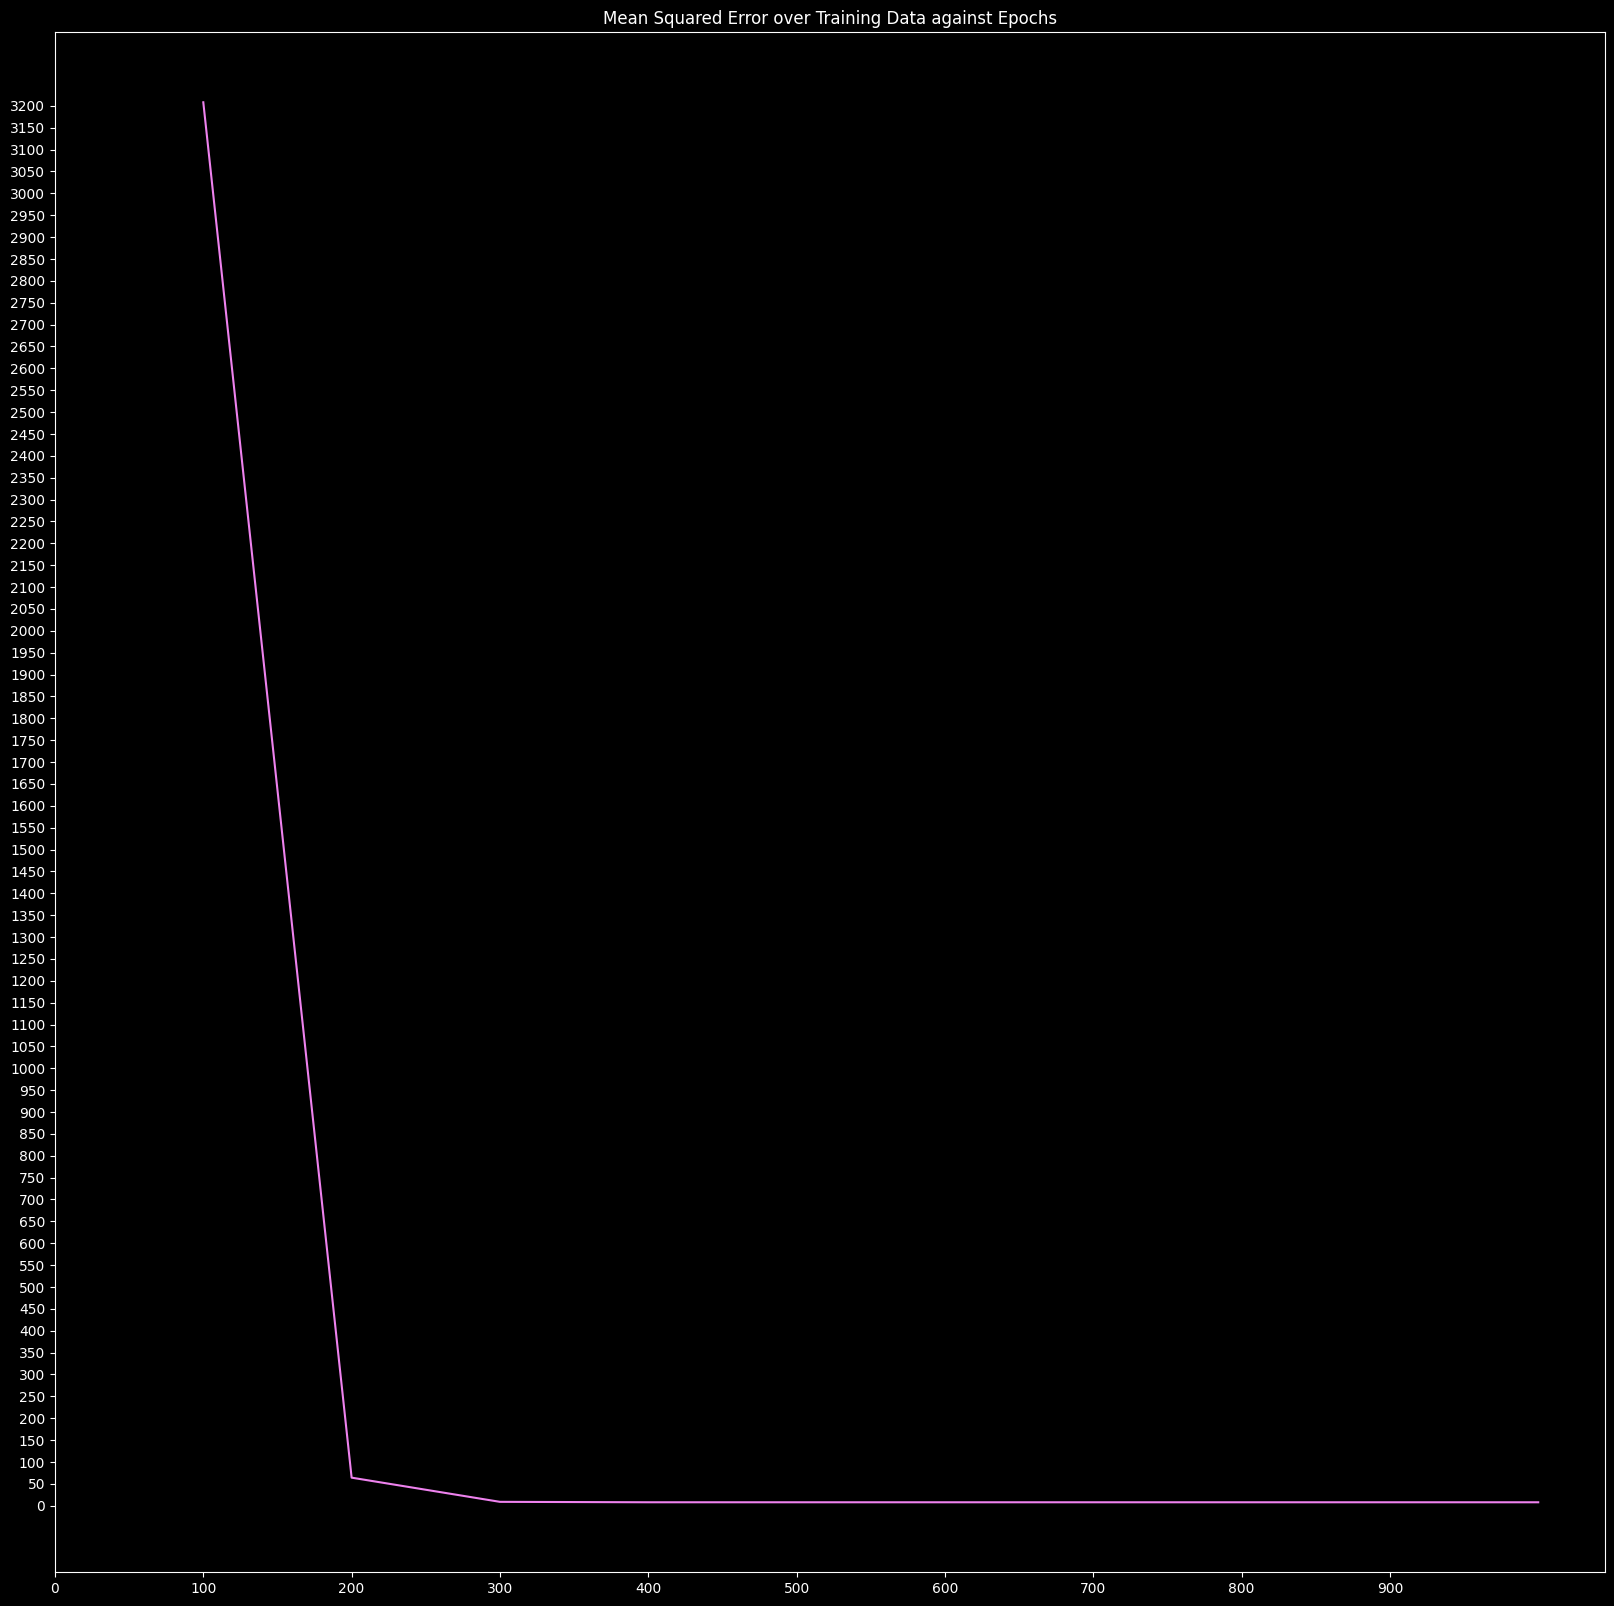

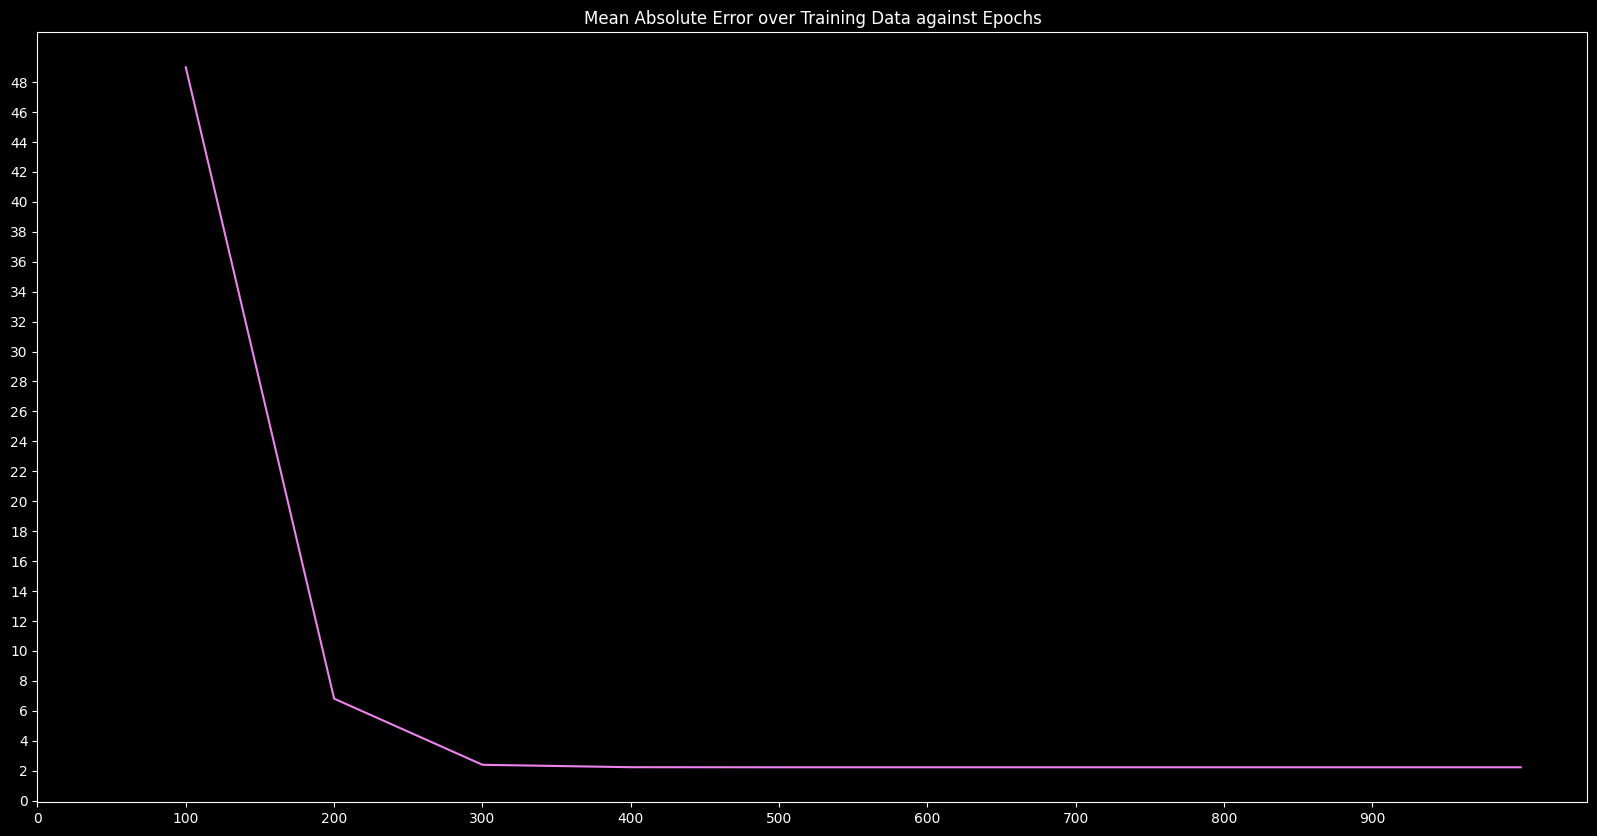

In [37]:
epochs=np.arange(100,1100,100)
plt.figure(figsize=(20,20))
plt.title("Mean Squared Error over Training Data against Epochs")
plt.plot(epochs,mse,color='violet')
plt.xticks(np.arange(0, max(epochs), 100))
plt.yticks(np.arange(0, max(mse)+0.5, 50))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Mean Absolute Error over Training Data against Epochs")
plt.plot(epochs,mae,color='violet')
plt.xticks(np.arange(0, max(epochs), 100))
plt.yticks(np.arange(0, max(mae)+0.5, 2))
plt.show()

In [10]:
print("Mean Squared Error: ",mean_squared_error(te['y'],pred))
print("Mean Absolute Error: ",mean_absolute_error(te['y'],pred))
print("R2 Score: ",r2_score(te['y'],pred))

Mean Squared Error:  9.432922287936112
Mean Absolute Error:  2.4157718585698764
R2 Score:  0.9888014443189097


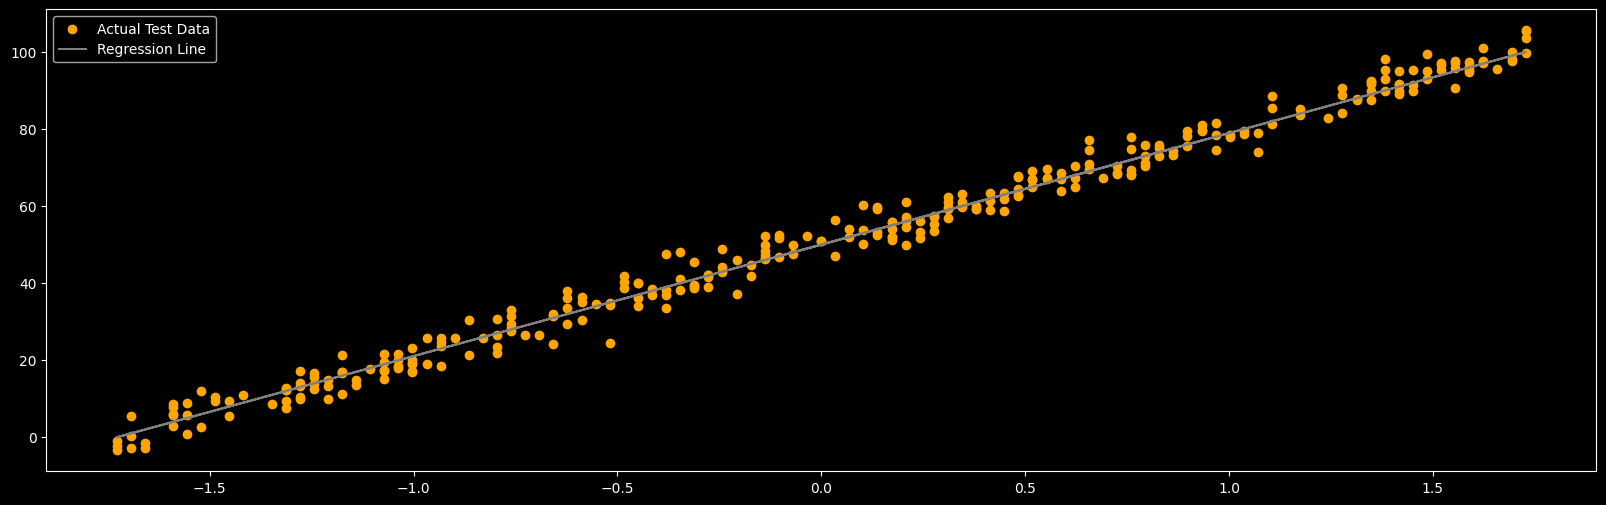

In [11]:
plt.figure(figsize=(20,6))
plt.scatter(te['x'], te['y'], color='orange', label='Actual Test Data')
plt.plot(te['x'],pred, color='grey', label='Regression Line')
plt.legend()
plt.show()

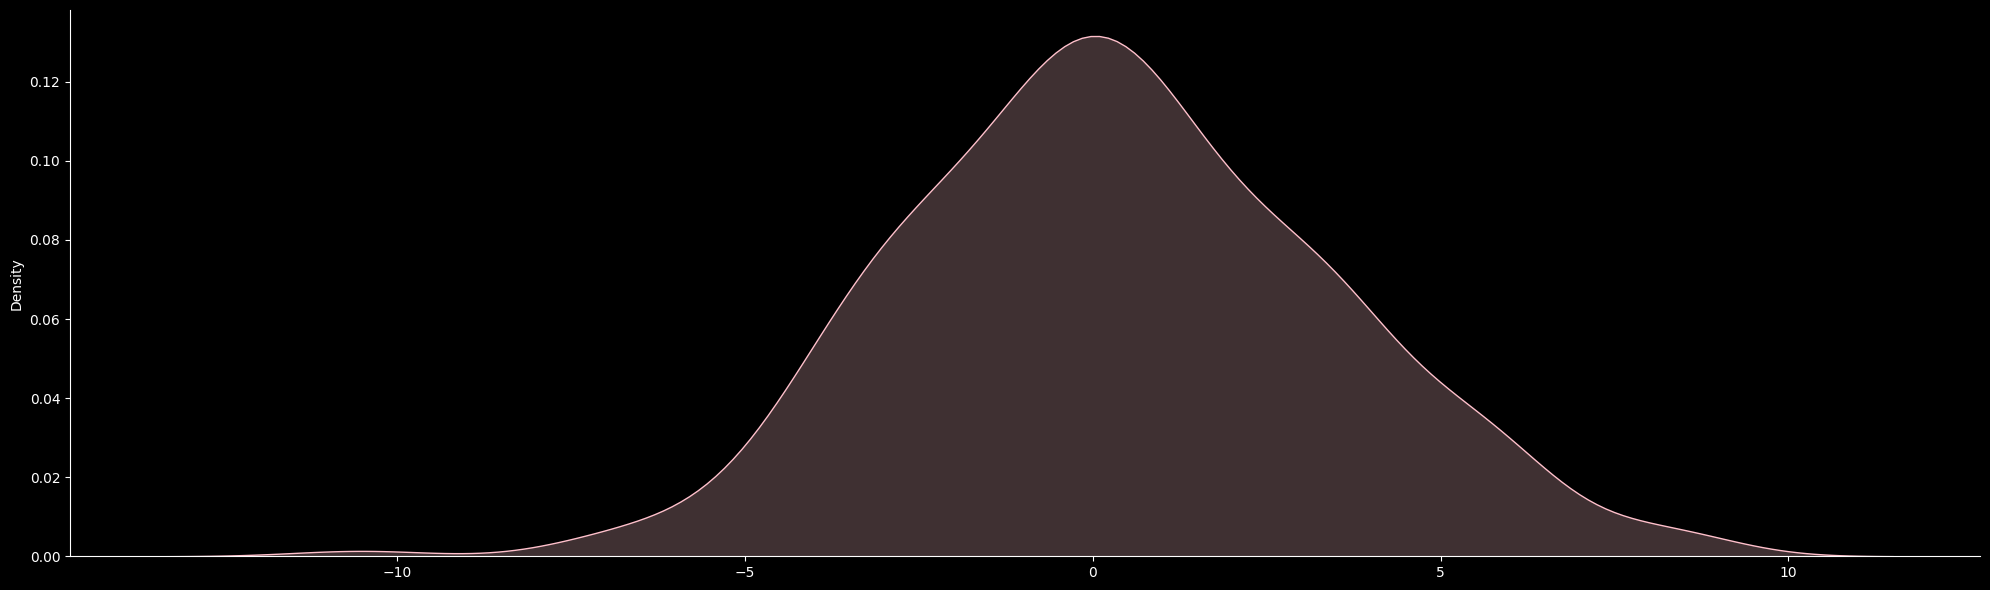

In [12]:
sns.displot(te['y'] - pred, kind='kde', fill=True, color='pink', height=6, aspect=20/6)
plt.show()